# Predicting absenteeism at work using machine learning

This notebook looks into using various machine learning and data science approaches in an attempt to build a machine learning model capable of predicting hours of absenteeism at workd based on different related attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given the following parameters about a employee, can we predict hours of absenteeism at work?

## 2. Data

The original data came from the Universidade Nove de Julho data from the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

## 3. Evaluation

> We want to find the best classification machine learning model to predict hours of absenteeism at work

## 4. Features

This is where you'll get different information about each of the features in data. [source](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)


**Create data dictionary**

1. ID - Individual identification
2. Reason for absence 
- that attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
    * 1: Certain infectious and parasitic diseases
    * 2: Neoplasms
    * 3: Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    * 4: Endocrine, nutritional and metabolic diseases
    * 5: Mental and behavioural disorders
    * 6: Diseases of the nervous system
    * 7: Diseases of the eye and adnexa
    * 8: Diseases of the ear and mastoid process
    * 9: Diseases of the circulatory system
    * 10: Diseases of the respiratory system
    * 11: Diseases of the digestive system
    * 12: Diseases of the skin and subcutaneous tissue
    * 13: Diseases of the musculoskeletal system and connective tissue
    * 14: Diseases of the genitourinary system
    * 15: Pregnancy, childbirth and the puerperium
    * 16: Certain conditions originating in the perinatal period
    * 17: Congenital malformations, deformations and chromosomal abnormalities
    * 18: Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    * 19: Injury, poisoning and certain other consequences of external causes
    * 20: External causes of morbidity and mortality
    * 21: Factors influencing health status and contact with health services.
- And 7 categories without (CID):
    * 22: Patient follow-up
    * 23: Medical consultation
    * 24: Blood donation
    * 25: Laboratory examination
    * 26: Unjustified absence
    * 27: Physiotherapy
    * 28: Dental consultation
3. Month of absence
4. Day of the week
    * 2: Monday
    * 3: Tuesday
    * 4: Wednesday
    * 5: Thursday
    * 6: Friday
5. Seasons
    * 1: Summer
    * 2: Autumn
    * 3: Winter
    * 4: Spring
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure
    * 0: No
    * 1: Yes
13. Education
    * 1: High School
    * 2: Graduate
    * 3: Postgraduate
    * 4: Master and Doctor
14. Son (number of children)
15. Social drinker
    * 0: No
    * 1: Yes
16. Social smoker
    * 0: No
    * 1: Yes
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

* Researcher & Developer: Mehrzad Jafari Ranjbar
    * [GitHub](https://github.com/mehrzadjafari)
    * [LinkedIn](https://www.linkedin.com/in/mehrzad-jafari)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [23]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# we want our plots to appear inside the notebook
%matplotlib inline

# we want to use seaborn style for charts and graphs
plt.style.use('seaborn')

## Load data 

In [24]:
df = pd.read_csv("data/Absenteeism_at_work.csv", sep= ";")

## Preprocessing, Cleaning and Exploratory Data Analysis

The goal here is to find out more about the data and detecting and correcting the dataset based on what we need for our analysis

First, we take a look at information related to our data

In [25]:
print('Shape of dataset is:\n{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:
(740, 21)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


Let's see if we have any missing value in our dataset

In [26]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## Cleaning the dataset

* The 10th column **Work load Average/day** has forward slash `/` and we are replacing to avoid unnecessary errors in future.

In [27]:
df.columns = df.columns.str.replace('/', ' per ').str.strip()

Let's take a look at first 5 rows of the dataset

In [28]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


We want to explore the values of each columns to check their relevance and validty

Let's check them all, and we can decide which ones need to be corrected:

In [29]:
for col in df.columns:
    print(col + ' unique values are:\n{}'.format(sorted(df[col].unique())))
    print('Total number of values in this column is: \t{}'.format(df[col].nunique()))
    print(85*'-')

ID unique values are:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Total number of values in this column is: 	36
-------------------------------------------------------------------------------------
Reason for absence unique values are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
Total number of values in this column is: 	28
-------------------------------------------------------------------------------------
Month of absence unique values are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Total number of values in this column is: 	13
-------------------------------------------------------------------------------------
Day of the week unique values are:
[2, 3, 4, 5, 6]
Total number of values in this column is: 	5
-------------------------------------------------------------------------------------
Seasons unique values are:
[1, 2, 3, 4]
Tota

There are two main issues here. `Reason for absence` and `Month of absence`. <br> 
Let's have a closer look here:

In [30]:
print('Reason for absence unique values are:\n{}'.format(sorted(df["Reason for absence"].unique())))
print('Total number of values in this column is: \t{}'.format(df["Reason for absence"].nunique()))

Reason for absence unique values are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
Total number of values in this column is: 	28


Reason `0` didn't exist in the attributes documentation <br>
Looking at the plot:

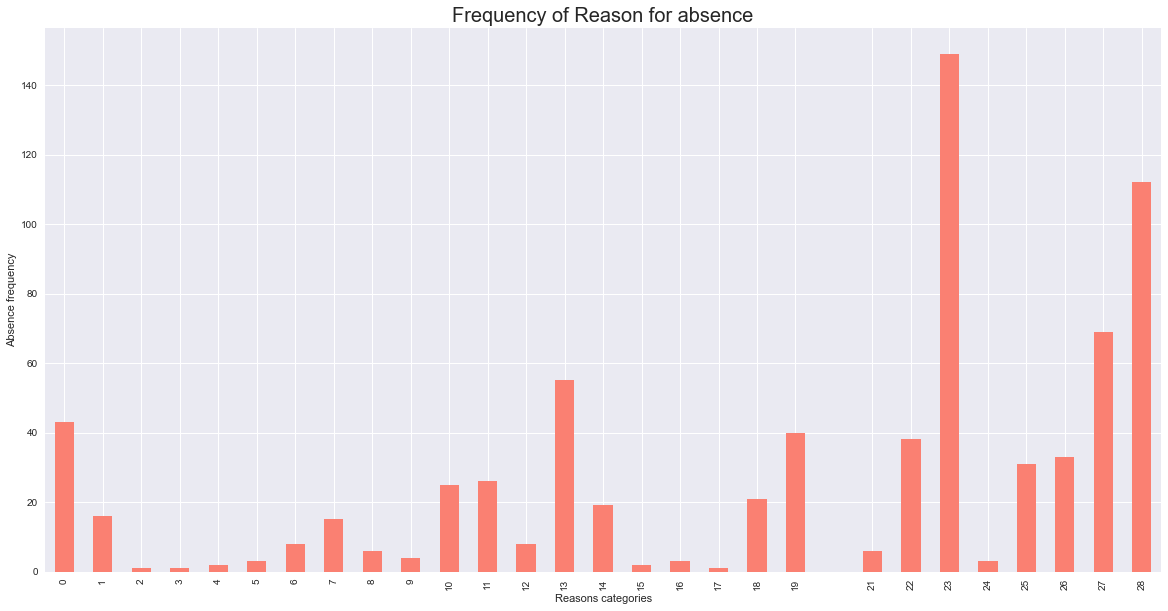

In [31]:
df["Reason for absence"].value_counts().plot(kind="bar", figsize=(20, 10), color = ['salmon'])

plt.title("Frequency of Reason for absence", fontsize = 20)
plt.xlabel("Reasons categories")
plt.ylabel("Absence frequency");

We can say that top 5 of the reasons for being absent were:

1. Medical consultation `23`
2. Dental consultation `28`
3. Physiotherapy `27`
4. Diseases of the musculoskeletal system and connective tissue `13`
5. There is no explaination for this reason `0`

Let's see how many records do we have:

In [32]:
print("We have " + str(df[df['Reason for absence'] == 0].shape[0]) + " records in this fraction, which is " + str(round(df[df['Reason for absence'] == 0].shape[0]/len(df), 2)*100) + "% of all of our records")
df[df['Reason for absence'] == 0]

We have 43 records in this fraction, which is 6.0% of all of our records


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,...,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,...,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,...,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,...,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,...,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,...,1,1,1,1,0,0,98,178,31,0
203,2,0,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0
214,18,0,5,4,3,330,16,4,28,378.884,...,1,2,0,0,0,0,84,182,25,0


We can discard them, as all of their target values (`Absenteeism time in hours`) are also 0.
It might have meant that there are no reason and therefore no absenteeism ! <br>
* Also we can see that if we discard this 6%, we'll also solve the `Month of absence` issue (Look at last 3 records)

In [33]:
df = df[df['Reason for absence'] != 0]

Let's look at some of the features

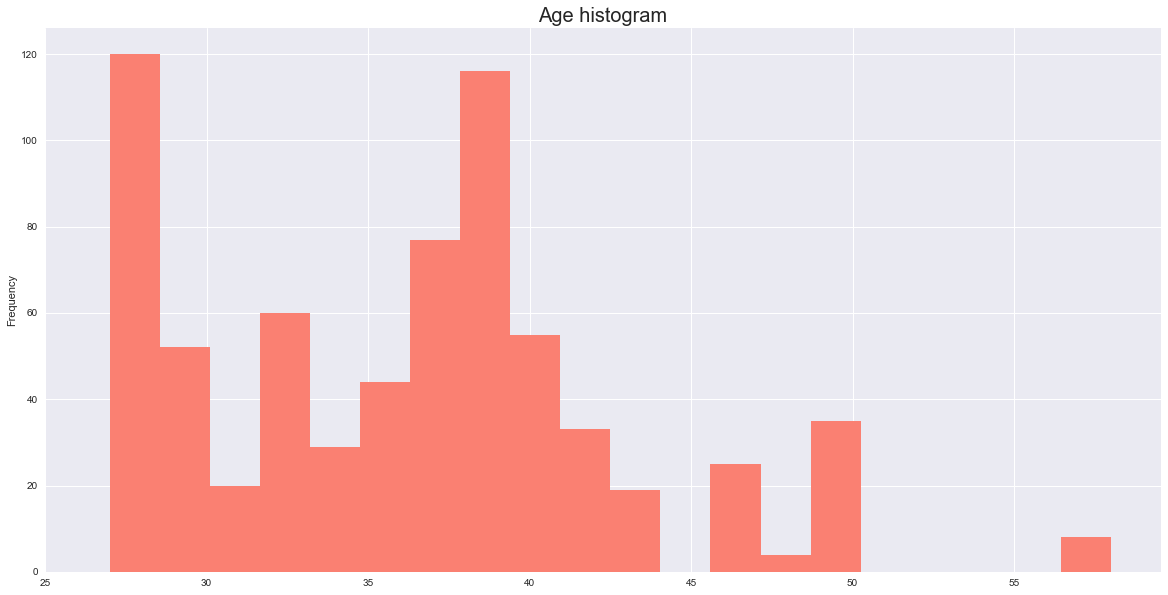

count    697.000000
mean      36.255380
std        6.376202
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

In [34]:
# Check the distribution of the age column with a histogram
df["Age"].plot.hist(figsize=(20, 10), bins = 20, color = ['salmon'])

plt.title("Age histogram", fontsize = 20)
plt.xticks(ticks= np.arange(25,60,5))
plt.show();
df["Age"].describe()

The mean of our employees' age is 36.25
As we can see on histogram their distribution

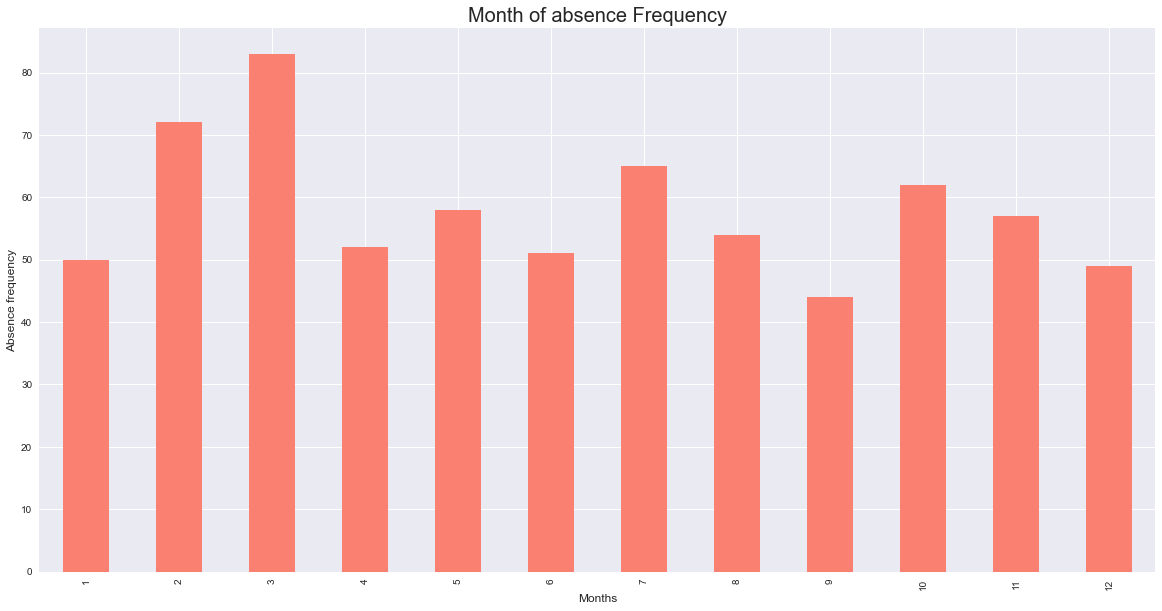

In [35]:
df["Month of absence"].value_counts().plot(kind="bar", figsize=(20, 10), color = ['salmon'])

plt.title("Month of absence Frequency", fontsize = 20)
plt.xlabel("Months", fontsize = 12)
plt.ylabel("Absence frequency", fontsize = 12)
plt.show();

We can say that top 3 Months of absense:

1. March `3`
2. February `2`
3. July `7`

As we can see, `Disciplinary failure` has only one value `0`.
So it would be better to drop it.

In [36]:
df.drop("Disciplinary failure", axis = 1, inplace= True)

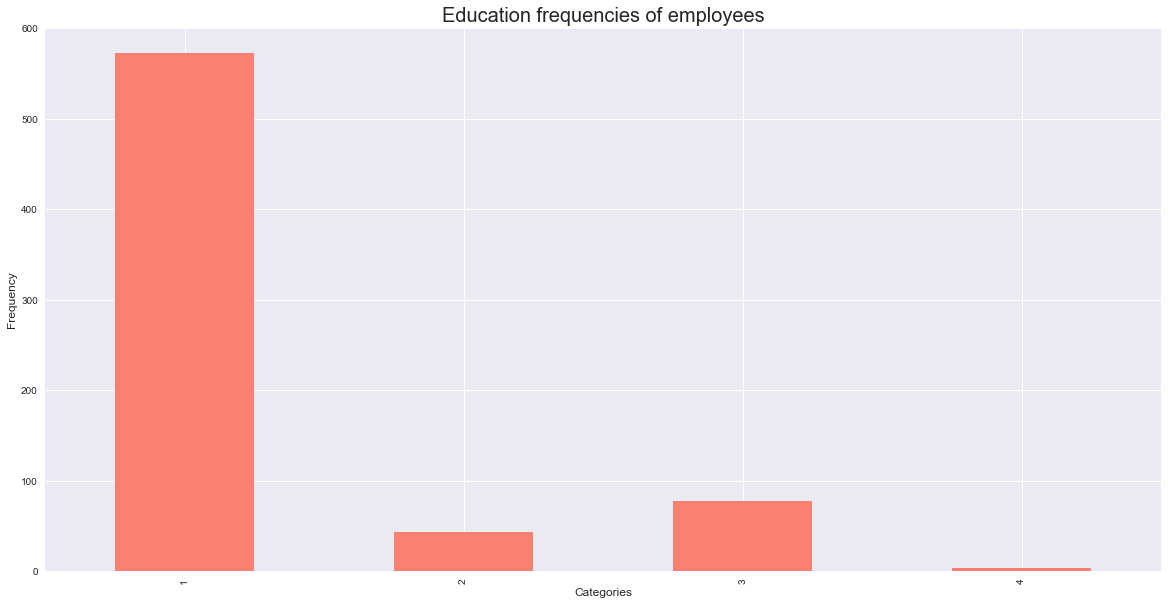

In [37]:
df["Education"].value_counts().plot(kind="bar", figsize=(20, 10), color = ['salmon'])

plt.title("Education frequencies of employees", fontsize = 20)
plt.xlabel("Categories", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12);

We can say most of our employees' education are until High School degree (`1`)

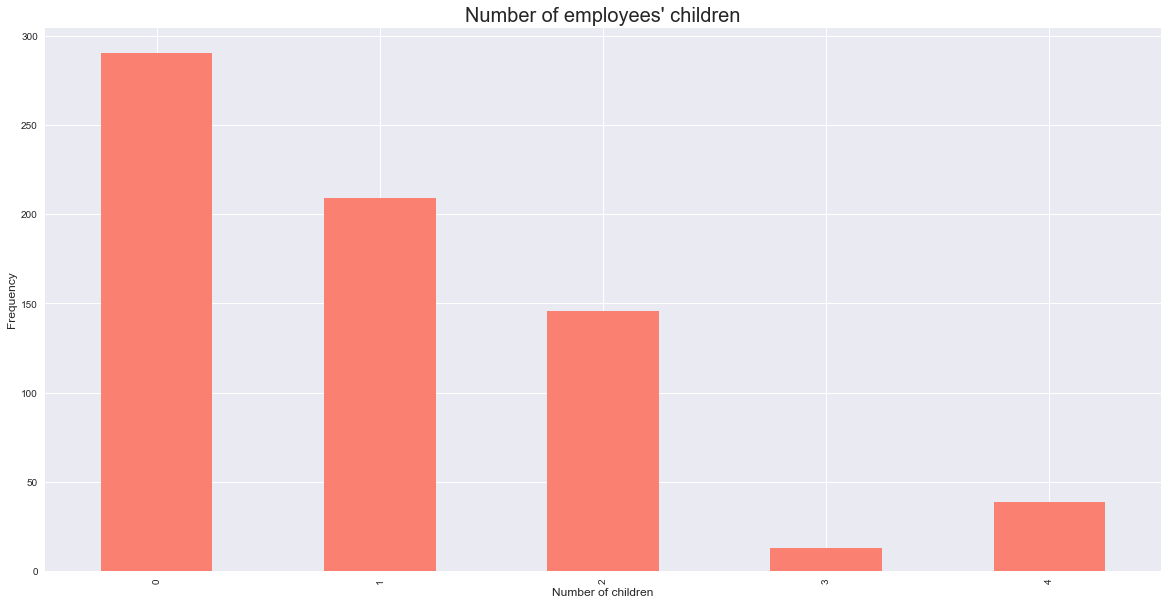

In [38]:
df["Son"].value_counts().plot(kind="bar", figsize=(20, 10), color = ['salmon'])
plt.title("Number of employees' children", fontsize = 20)
plt.xlabel("Number of children", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12);

Also the majority of them has either no child or only one

* Let's check the `info()` again

In [39]:
df.reset_index(drop = True, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               697 non-null    int64  
 1   Reason for absence               697 non-null    int64  
 2   Month of absence                 697 non-null    int64  
 3   Day of the week                  697 non-null    int64  
 4   Seasons                          697 non-null    int64  
 5   Transportation expense           697 non-null    int64  
 6   Distance from Residence to Work  697 non-null    int64  
 7   Service time                     697 non-null    int64  
 8   Age                              697 non-null    int64  
 9   Work load Average per day        697 non-null    float64
 10  Hit target                       697 non-null    int64  
 11  Education                        697 non-null    int64  
 12  Son                   

* Let's take a look at our target values `Absenteeism time in hours`:

In [40]:
df["Absenteeism time in hours"].value_counts().to_frame()

,Absenteeism time in hours
8,208
2,157
3,112
1,88
4,60
16,19
24,16
5,7
40,7
32,6


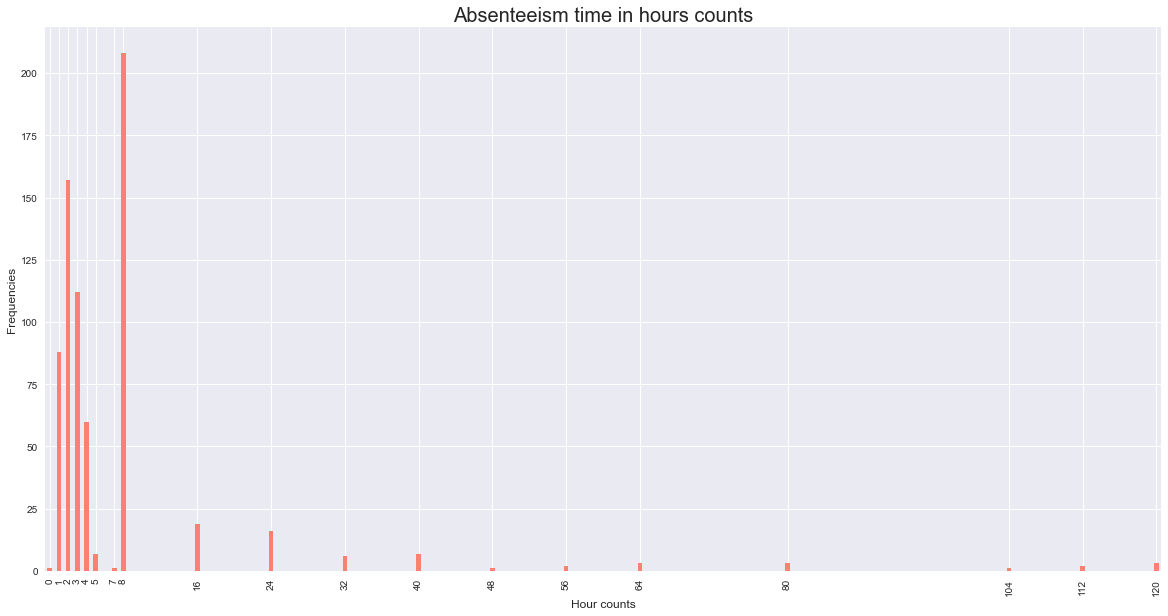

In [41]:
plt.figure(figsize=(20,10))
df["Absenteeism time in hours"].value_counts().plot(kind="bar", figsize=(20, 10), color = ['salmon'])

plt.title("Absenteeism time in hours counts", fontsize = 20)
plt.xlabel("Hour counts", fontsize = 12)
plt.ylabel("Frequencies", fontsize = 12);

## Introducing a new column for our prediction

Although, most of the absenteeism time are less than 8 hours.

So it might be a good idea to add another column to our dataset to show whether a person has over 8 hours of absenteeism or not.

In [42]:
df["Over8"] = df["Absenteeism time in hours"] >= 8

In [43]:
df.Over8.value_counts()

False    426
True     271
Name: Over8, dtype: int64

Now we can have a better look :

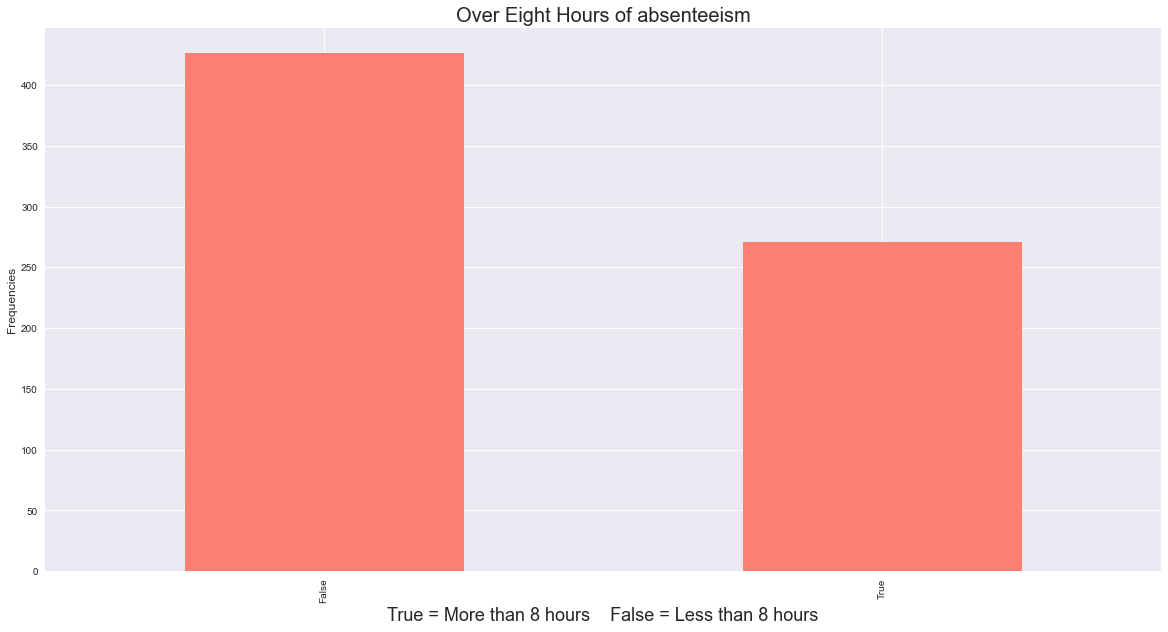

In [44]:
df["Over8"].value_counts().plot(kind="bar", figsize=(20, 10), color = ["salmon"]);
plt.title("Over Eight Hours of absenteeism", fontsize = 20)
plt.xlabel("True = More than 8 hours    False = Less than 8 hours", fontsize = 18)
plt.ylabel("Frequencies", fontsize = 12);

* Next step in the cleaning of the dataset is to change the appropriate data types of the columns

In [45]:
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               697 non-null    int64   
 1   Reason for absence               697 non-null    category
 2   Month of absence                 697 non-null    category
 3   Day of the week                  697 non-null    category
 4   Seasons                          697 non-null    category
 5   Transportation expense           697 non-null    int64   
 6   Distance from Residence to Work  697 non-null    int64   
 7   Service time                     697 non-null    int64   
 8   Age                              697 non-null    int64   
 9   Work load Average per day        697 non-null    float64 
 10  Hit target                       697 non-null    int64   
 11  Education                        697 non-null    category
 12  Son     

Let's check some of the features <br>

Here we see which `Reason for absence` could lead to more 8 hours of absenteeism:

In [47]:
pd.crosstab(df["Reason for absence"], df["Over8"])

Over8,False,True
Reason for absence,,
1,2,14
2,0,1
3,0,1
4,1,1
5,1,2
6,1,7
7,7,8
8,3,3
9,0,4


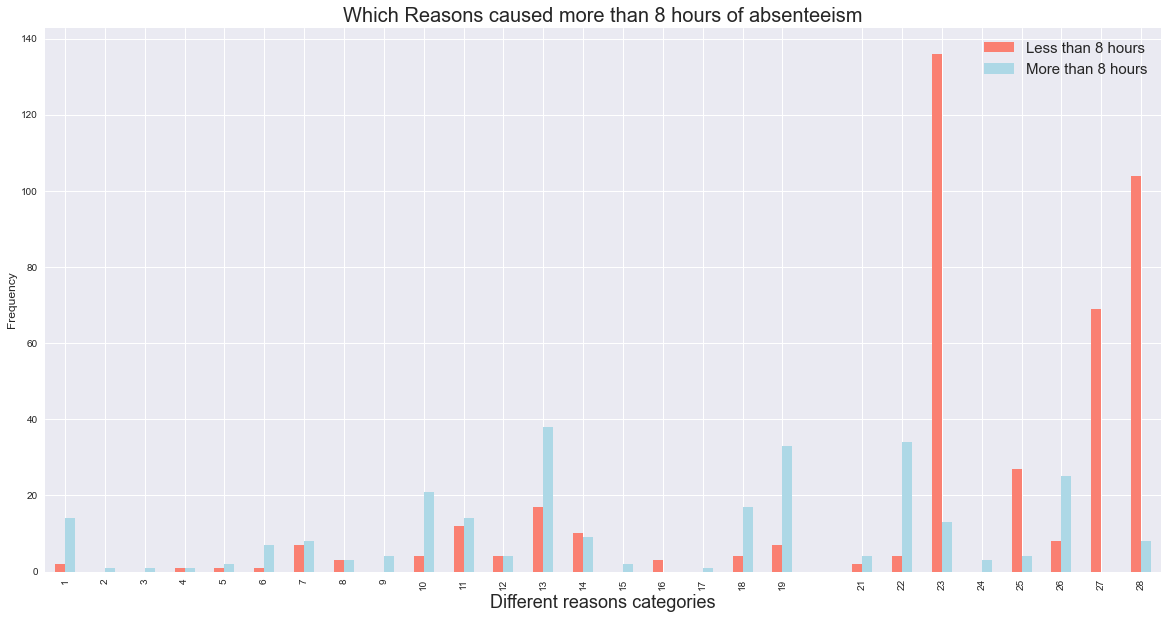

In [48]:
pd.crosstab(df["Reason for absence"], df["Over8"]).plot(kind="bar",
                                    figsize=(20, 10),
                                    color=["salmon", "lightblue"])

plt.title("Which Reasons caused more than 8 hours of absenteeism", fontsize = 20)
plt.xlabel("Different reasons categories", fontsize = 18)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(["Less than 8 hours", "More than 8 hours"], fontsize = 15);

Let's also check if `Seasons` are related to `Over8`

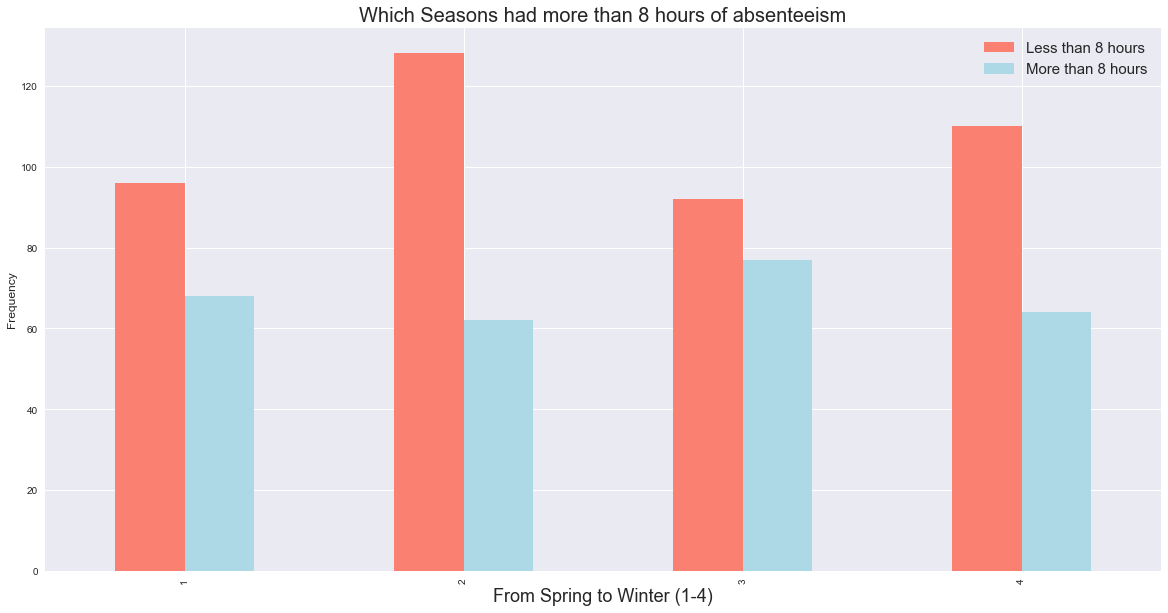

In [27]:
pd.crosstab(df["Seasons"], df["Over8"]).plot(kind="bar",
                                    figsize=(20, 10),
                                    color=["salmon", "lightblue"])

plt.title("Which Seasons had more than 8 hours of absenteeism", fontsize = 20)
plt.xlabel("From Spring to Winter (1-4)", fontsize = 18)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(["Less than 8 hours", "More than 8 hours"], fontsize = 15);

We also might want to take a look at correlation between each columns <br>
We'll use seaborn heatmap to plot their correlation

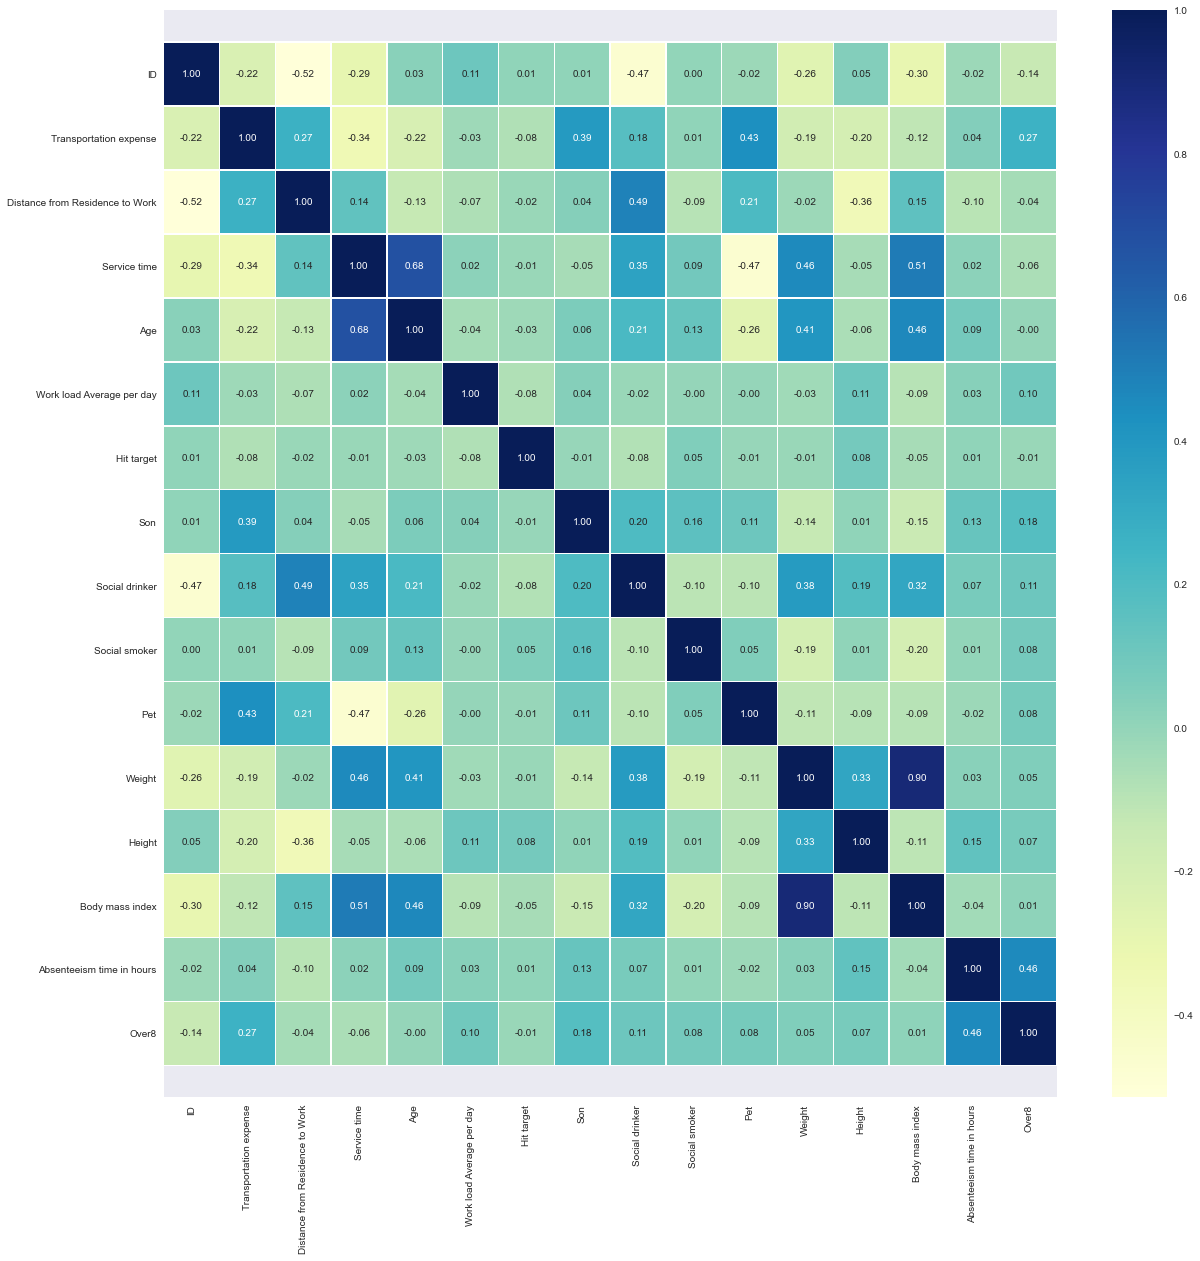

In [28]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

We can see that `Absenteeism time in hours` column couldn't help much for our analysis and obviously it has a highly positive correlation with our target `Over8`. Therefore, we'll drop it and reset our indexes.

In [29]:
df.drop("Absenteeism time in hours", axis = 1, inplace= True)
df.drop("ID", axis = 1, inplace= True)
df.reset_index(drop = True, inplace= True)

## Modeling

In [14]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [31]:
# Split data into X and y
X = df.drop("Over8", axis=1)

y = df["Over8"]

In [32]:
X[:5]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30
1,23,7,4,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31
2,7,7,5,1,279,5,14,39,239.554,97,1,2,True,True,0,68,168,24
3,23,7,5,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30
4,23,7,6,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31


In [33]:
y.describe()

count       697
unique        2
top       False
freq        426
Name: Over8, dtype: object

### Slicing the data for Training and Testing (Sample size 20/80)

In [34]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

* We're going to try 3 different machine learning models:
    * 1. Logistic Regression 
    * 2. K-Nearest Neighbours Classifier
    * 3. Random Forest Classifier


In [35]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\engme\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.7928571428571428,
 'KNN': 0.7142857142857143,
 'Random Forest': 0.85}

### Model Comparison

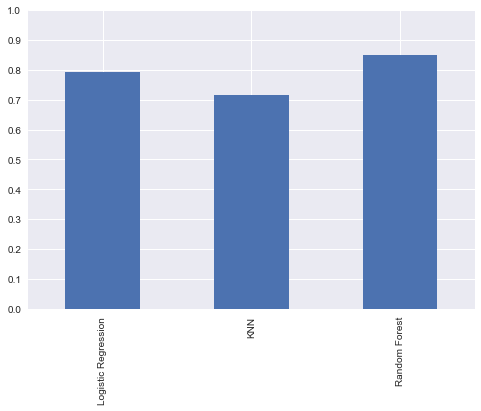

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.yticks(ticks= np.arange(0,1.1,0.1))
plt.legend("")
plt.show();

We have our baseline models now and even without tuning we had great results but we should dig more into it

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [38]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 76.43%


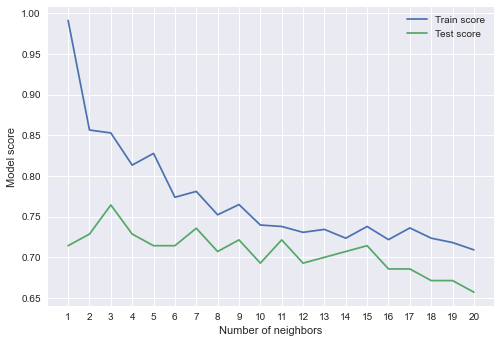

In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Our initial model had 42.14% accuracy and we could make increase it by 47.86% which is not promising.

* Let's take a look at other models:
    * `LogisticRegression()`
    * `RandomForestClassifier()`

### RandomizedSearchCV

In [40]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [41]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [43]:
rs_log_reg.score(X_test, y_test)

0.7928571428571428

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestClassifier()`...

In [44]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [46]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8571428571428571

## Hyperparamter Tuning with GridSearchCV

Since our RandomForrest model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [48]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(300, 600, 50),
           "max_depth": [None],
           "min_samples_split": np.arange(10, 16, 2),
           "min_samples_leaf": np.arange(5, 8, 2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished


In [49]:
# Check the best hyperparmaters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 350}

In [50]:
# Evaluate the grid search RandomForestClassifier model
gs_rf.score(X_test, y_test)

0.85

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [51]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)

In [52]:
y_preds

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False,

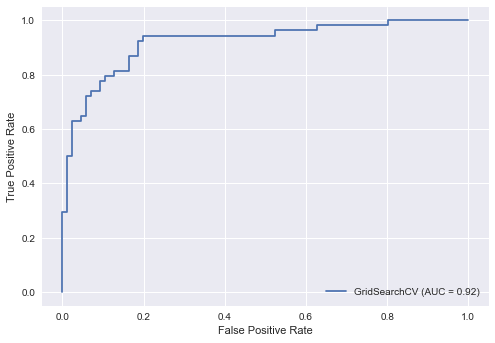

In [53]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

In [54]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[75 11]
 [10 44]]


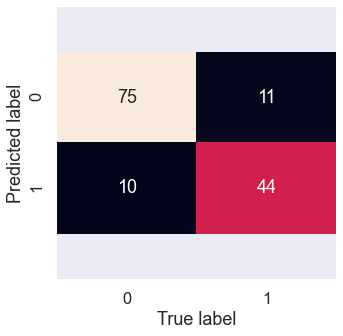

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.88      0.87      0.88        86
        True       0.80      0.81      0.81        54

    accuracy                           0.85       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.85      0.85      0.85       140



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [57]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 350}

In [58]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(max_depth = None, 
                             min_samples_leaf = 5, 
                             min_samples_split = 14, 
                             n_estimators = 350)

In [59]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.85714286, 0.75714286, 0.81294964, 0.71942446, 0.79136691])

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7876053442959917

In [61]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7282969739619986

In [62]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7377104377104378

In [63]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7379705862897714

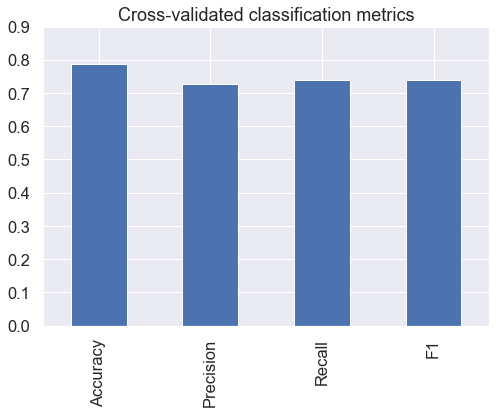

In [67]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)
plt.yticks(ticks= np.arange(0,1, 0.1));

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [69]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=10000.0,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [70]:
# Check coef_
clf.coef_

array([[-1.62161230e-01,  2.14528517e-02, -1.48780336e-01,
        -1.11512533e-01,  8.43853308e-03, -2.22236726e-02,
        -4.89510139e-02, -4.62935916e-03,  5.46614969e-03,
         5.21958770e-02, -4.05824118e-03,  2.76529459e-01,
         1.03230713e+00,  9.45980920e-01, -2.61630668e-02,
         2.60689235e-02, -3.69050277e-02, -3.33392893e-04]])

In [71]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Over8
0,26,7,3,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30,False
1,23,7,4,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31,False
2,7,7,5,1,279,5,14,39,239.554,97,1,2,True,True,0,68,168,24,False
3,23,7,5,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30,False
4,23,7,6,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31,False


In [72]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Reason for absence': -0.16216122990323056,
 'Month of absence': 0.021452851731501337,
 'Day of the week': -0.14878033573486116,
 'Seasons': -0.11151253297214442,
 'Transportation expense': 0.008438533078573923,
 'Distance from Residence to Work': -0.022223672608187018,
 'Service time': -0.048951013858738346,
 'Age': -0.004629359163916391,
 'Work load Average per day': 0.005466149688273921,
 'Hit target': 0.05219587698758037,
 'Education': -0.004058241179690456,
 'Son': 0.27652945923628836,
 'Social drinker': 1.0323071275666884,
 'Social smoker': 0.9459809202754565,
 'Pet': -0.02616306683975719,
 'Weight': 0.02606892346551097,
 'Height': -0.03690502767374886,
 'Body mass index': -0.00033339289311789394}

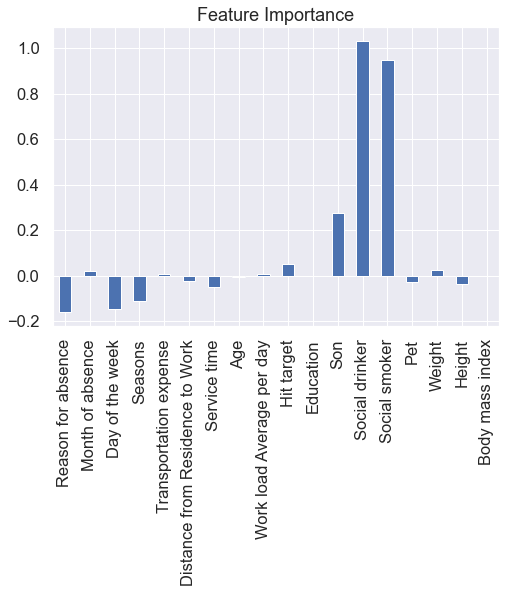

In [73]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);